# Inteligencia Artifiicial
## PIA Martes N4

Integrantes:


*   1637233  Bryan Antonio Soria Rodriguez
*   1799790  Karen Giselle Valdez Muñoz
*   1671460  Heidi Olivares Ayala 
*   1852486  Sergio Aaron Martinez Lauria 
*   1857520  Eduardo Ortega Corpus

Lo primero que se realizo fue importar las librerias que se van a utilizar, en este caso fue la libreria de TensorFlow y posteriormente llamamos a la libreria de Keras la cual nos ayuda y facilita darle estructura a la red neuronal artificial, con esta importamos las funciónes de layers, models y datasets, la cual nos ayuda a descargar el set de datos de CIFAR-100. Igualmente, importamos la libreria de matplotlib, la cual nos ayuda a crear graficas de los resultados obtenidos.

Luego descargamos el set de datos CIFAR-100 con la etiqueta de 'coarse', la cual hace que las imagenes del set se clasifiquen por la etiqueta de las 20 superclasses y se descargan la cantidad de imagenes ya establecidas para el entrenamiento y de prueba.

Finalmente, ya cuando las imagenes de entrenamiento y de prueba esten guardadas en sus respectivas variables se van normalizar los valores de los pixeles de las imagenes para que sean entre 0 y 1, dividiendolas entre 255, esto hace que el procesamiento de los datos sea mas sencillo para el entrenamiento de la red neuronal artificial.

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data(label_mode='coarse')

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

169017344/169001437 [==============================] - 2s 0us/step


Se guardo en una lista los nombres de las 20 superclases para posteriormente verificar que el conjunto de datos se vea correcto. Para esto se imprimieron las primeras 25 imágenes del conjunto de entrenamiento y se mostro el nombre de la superclase debajo de cada imagen.

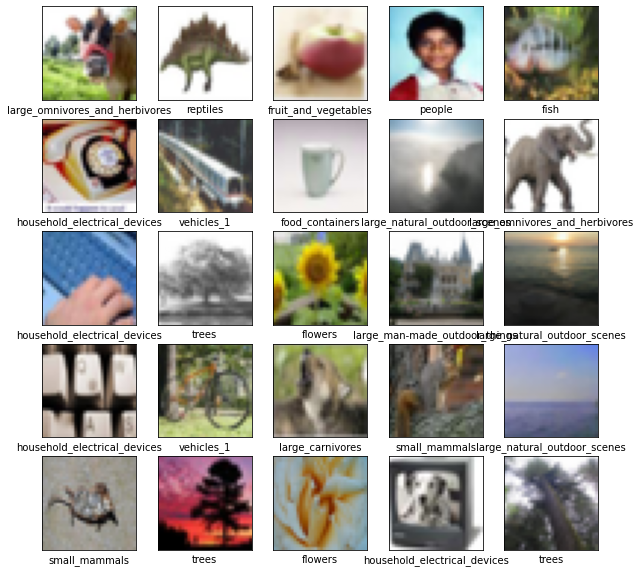

In [ ]:
super_names= ['aquatic_mammals', 'fish', 'flowers', 'food_containers', 'fruit_and_vegetables',
                             'household_electrical_devices', 'household_furniture', 'insects', 'large_carnivores', 
                             'large_man-made_outdoor_things', 'large_natural_outdoor_scenes', 'large_omnivores_and_herbivores',
                             'medium_mammals', 'non-insect_invertebrates', 'people', 'reptiles', 'small_mammals', 'trees', 
                             'vehicles_1', 'vehicles_2']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(super_names[train_labels[i][0]])
plt.show()

Posteriormente se comenzó a  crear la red neuronal convolusional, en donde se extrayen caracteristicas y se modifican  las imagenes inciales, guardando capa por capa de nuestro modelo secuencial en la variable model. En este modelo se utilizaron 2 capas de Conv2D con filtro de (3,3), con un numero de neuronas de 64 cada una y la función de activación relu y 2 capas de MaxPooling2D con un filtro de (2,2). Finalemente, se imprimió el resumen de las capas que tiene la red.

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.MaxPooling2D((2, 2)))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________


Para que el modelo este completo es necesario agregar capas densas. Se agrego una capa de Flatten, la cual  aplana los pixeles de las imagenes para crear un solo arreglo unideminsional. Luego se agregaron dos capas densas la primera de 64 neuronas con la activación relu y la capa densa de salida con 20 neuronas, esto debido a que solo hay 20 superclases sin función de activación. Finalmente, se imprimió el resumen de la estructura de la red neuronal convolusional. 

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(20))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 64)                2

A continuación, se compila y comienza el entrenamiento del modelo. En este caso, se entreno con 10 epochs y se obtuvieron los resultados del accuracy y perdida de entrenamiento y de prueba. 

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1247/1563 [======================>.......] - ETA: 55s - loss: 2.3608 - accuracy: 0.2766

Utilizando  la función de matplotlib, se creó  una gráfica para comparar los dos valores de presición del entrenamiento y de la prueba. Como se puede observar cada epoch la presición del entrenamiento iba subiendo constantemente hasta llegar a 0.6932, en cambio con la presición de prueba los valores no subieron de igual manera y se llego a 0.5396.

313/313 - 11s - loss: 1.6616 - accuracy: 0.5120 - 11s/epoch - 36ms/step


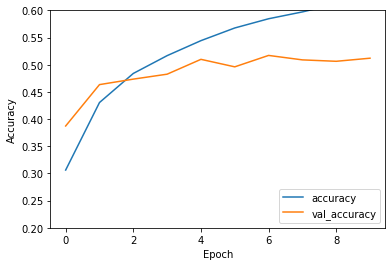

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 0.6])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

Finalemente, se imprimio la exactitud general de toda la red neuronal convolusional.

In [ ]:
print(test_acc)

0.5120000243186951
